In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility import *
from tools import *
from maps import *

In [2]:
# Load the Data's directory.
datadir = 'C:/Users/Kevin/Desktop/SstAnalysis/08-04-25/03_01_01.zda'

# Load the Tool Packages.
DataLoader = DataLoader(datadir)
Tools = Tools()
Maps = Maps()

In [3]:
# Parameters Setting.
startPt = 90
numPt = 60
basePt = 90
skipPt = 60
index = np.linspace(0, 550, 80)
threshold = 0.5

# Load and preprocess the Data.
Data = DataLoader.get_data() # Trials * height * width * timepoints.
Data = Tools.Polynomial(startPt=basePt, numPt=skipPt, Data=Data)
Data = Tools.T_filter(Data=Data)
Data = Tools.S_filter(sigma=1, Data=Data)

Data_ave = np.mean(np.copy(Data), axis=0) # height * width * timepoints.
Data_win = Data_ave[:, :, startPt:(startPt+numPt)]
Data_init = Data_ave[:, :, :basePt]

In [4]:
# SNR Map Calculation.
SD = np.zeros((Data.shape[1], Data.shape[2]))
Amp = np.zeros((Data.shape[1], Data.shape[2]))

for i in range(Data_win.shape[0]):
    for j in range(Data_win.shape[1]):
        
        Amp[i][j] = np.max(np.abs(Data_win[i][j]))
        
for i in range(Data_init.shape[0]):
    for j in range(Data_init.shape[1]):
        
        SD[i][j] = np.std(Data_init[i][j])
        
SNR = Amp / SD
SNR = SNR / np.max(SNR)

# RLI Map Calculation.
RLI = DataLoader.data[0, 0, :, :]

In [5]:
# Clustering Map Calculation.
Cluster = np.zeros((SNR.shape[0], SNR.shape[1]))

for i in range(SNR.shape[0]):
    for j in range(SNR.shape[1]):
        if SNR[i][j] >= threshold:
            Cluster[i][j] = 1
        else:
            Cluster[i][j] = 0

# Maximum Amplitude Map Calculation.
Max_Amp = np.zeros((Data.shape[1], Data.shape[2]))

for i in range(Data.shape[1]):
    for j in range(Data.shape[2]):
        Max_Amp[i][j] = np.max(Data_win[i][j])
        
Max_Amp = Max_Amp / np.max(Max_Amp)

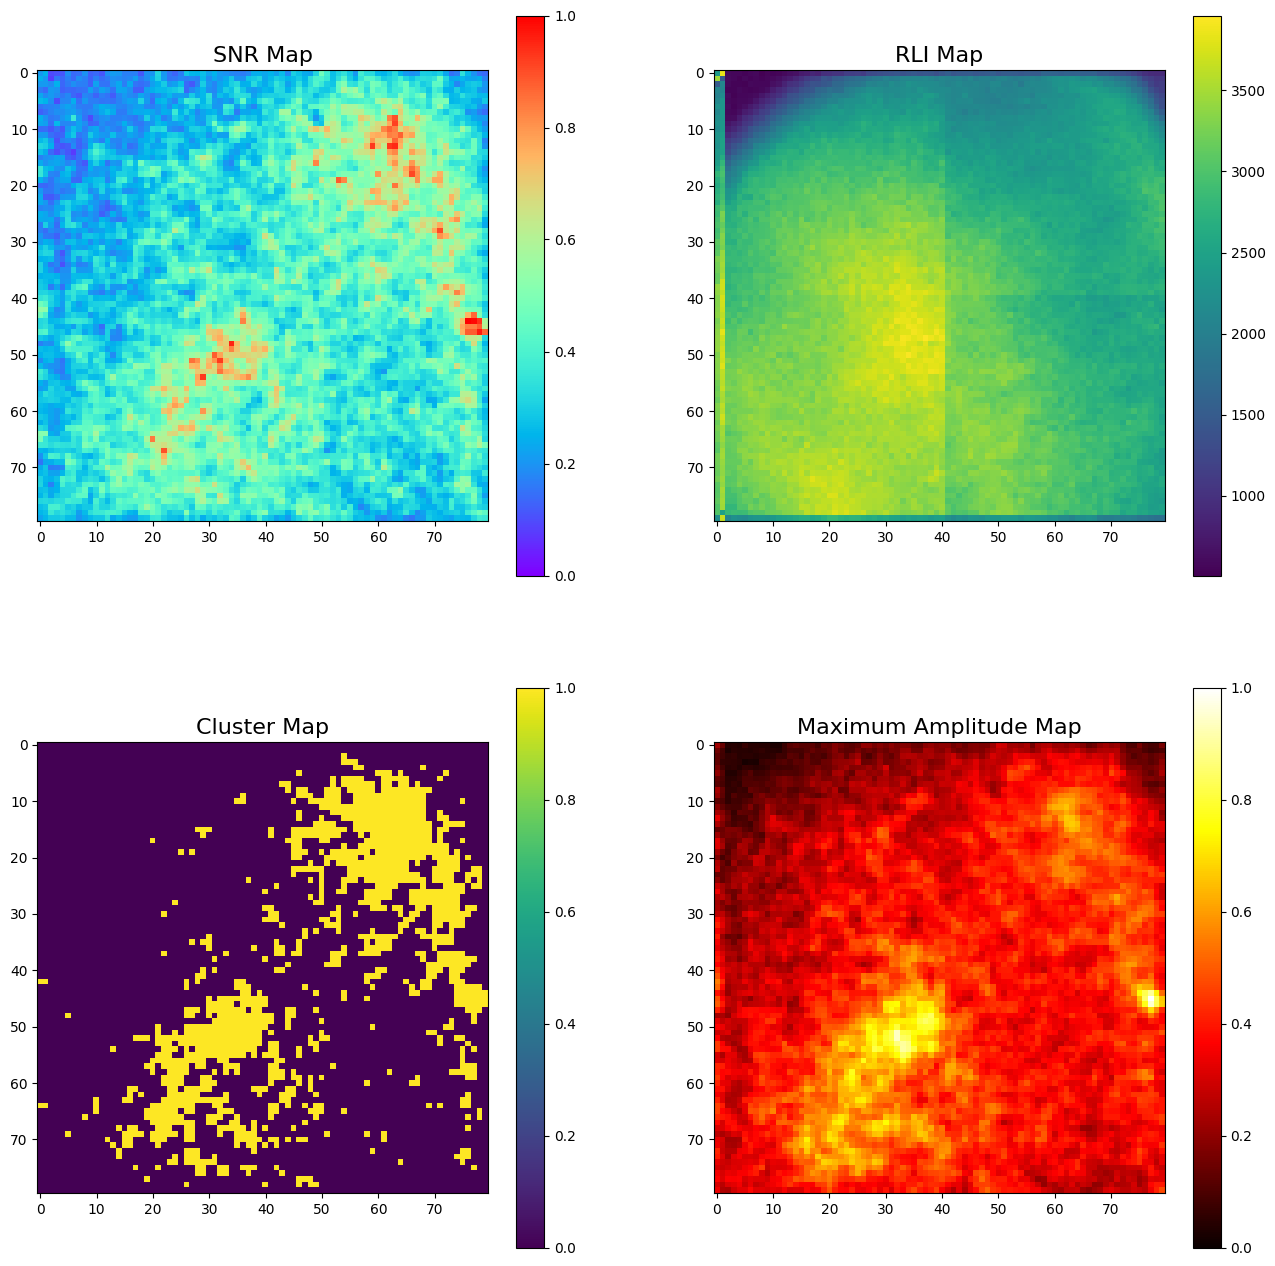

In [6]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

im1 = axs[0, 0].imshow(SNR, vmin=0, vmax=1, cmap='rainbow')
axs[0, 0].set_title('SNR Map', fontsize=16)
fig.colorbar(im1, ax=axs[0, 0])

im2 = axs[0, 1].imshow(RLI)
axs[0, 1].set_title('RLI Map', fontsize=16)
fig.colorbar(im2, ax=axs[0, 1])

im3 = axs[1, 0].imshow(Cluster, vmin=0, vmax=1)
axs[1, 0].set_title('Cluster Map', fontsize=16)
fig.colorbar(im3, ax=axs[1, 0])

im4 = axs[1, 1].imshow(Max_Amp, vmin=0, vmax=1, cmap='hot')
axs[1, 1].set_title('Maximum Amplitude Map', fontsize=16)
fig.colorbar(im4, ax=axs[1, 1])

plt.show()

In [7]:
# Horizontal Velocity.
H_Velocity = np.zeros(Data_win.shape[0])

for i in range(Data_win.shape[0]):
    value = 0
    count = 0
    for j in range(Data_win.shape[0]):
        if SNR[Data_win.shape[0]-1-i][j] >= threshold:
            
            value = value + Maps.Half_Amp_Latency(Data_win[Data_win.shape[0]-1-i, j, :])
            count = count + 1
    if count > 0:        
        H_Velocity[i] = value / count

In [8]:
# Vertical Velocity.
V_Velocity = np.zeros(Data_win.shape[1])

for i in range(Data_win.shape[1]):
    value = 0
    count = 0
    for j in range(Data_win.shape[1]):
        if SNR[Data_win.shape[1]-1-j][i] >= threshold:
            
            value = value + Maps.Half_Amp_Latency(Data_win[Data_win.shape[1]-1-j, i, :])
            count = count + 1 
    if count > 0:        
        V_Velocity[i] = value / count

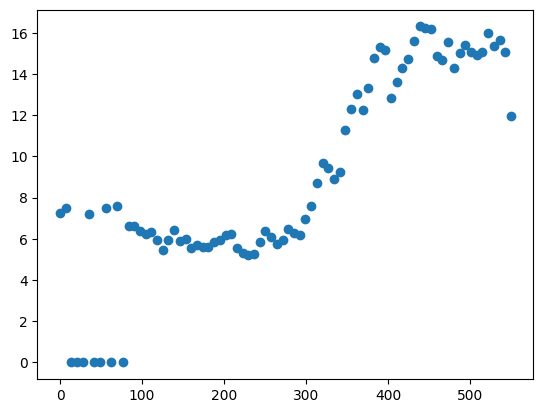

In [9]:
plt.scatter(index, V_Velocity)
plt.show()

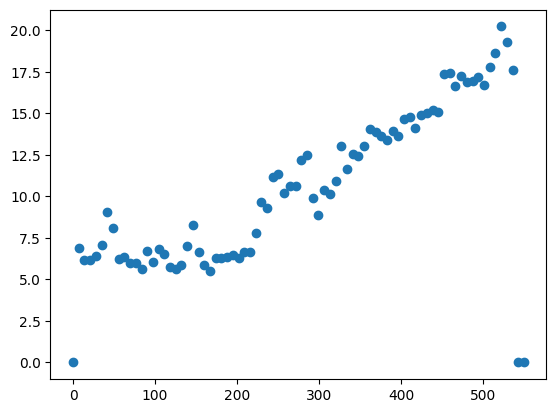

In [10]:
plt.scatter(index, H_Velocity)
plt.show()

In [11]:
V_Velocity_cor = []
tag_V = []

for i in range(80):
    if V_Velocity[i]<=0:
        continue
    else:
        V_Velocity_cor.append(V_Velocity[i])
        tag_V.append(i)

V_Velocity_cor = np.array(V_Velocity_cor)
tag_V = np.array(tag_V)

In [12]:
H_Velocity_cor = []
tag_H = []

for i in range(80):
    if H_Velocity[i]<=0:
        continue
    else:
        H_Velocity_cor.append(H_Velocity[i])
        tag_H.append(i)

H_Velocity_cor = np.array(H_Velocity_cor)
tag_H = np.array(tag_H)

In [13]:
y_coor = tag_H[np.argmin(H_Velocity_cor)]
x_coor = tag_V[np.argmin(V_Velocity_cor)]

print(x_coor)
print(y_coor)

33
24


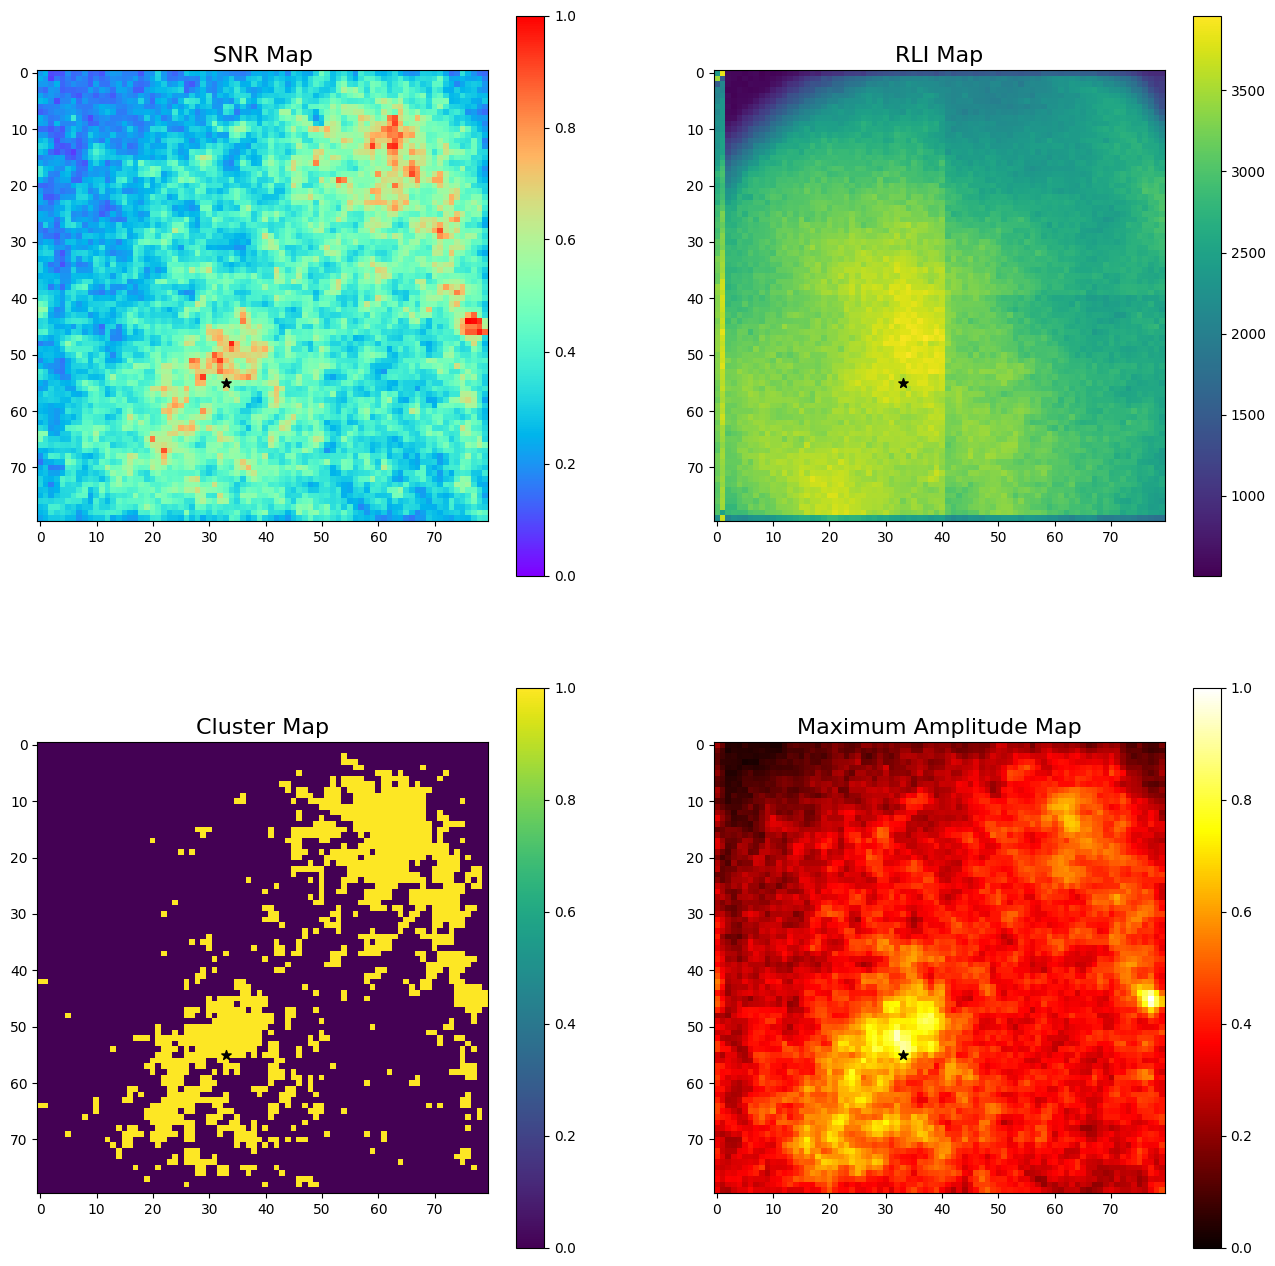

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

im1 = axs[0, 0].imshow(SNR, vmin=0, vmax=1, cmap='rainbow')
axs[0, 0].set_title('SNR Map', fontsize=16)
axs[0, 0].scatter(x_coor, 79-y_coor, marker='*', color='black', s=50)
fig.colorbar(im1, ax=axs[0, 0])

im2 = axs[0, 1].imshow(RLI)
axs[0, 1].set_title('RLI Map', fontsize=16)
axs[0, 1].scatter(x_coor, 79-y_coor, marker='*', color='black', s=50)
fig.colorbar(im2, ax=axs[0, 1])

im3 = axs[1, 0].imshow(Cluster, vmin=0, vmax=1)
axs[1, 0].set_title('Cluster Map', fontsize=16)
axs[1, 0].scatter(x_coor, 79-y_coor, marker='*', color='black', s=50)
fig.colorbar(im3, ax=axs[1, 0])

im4 = axs[1, 1].imshow(Max_Amp, vmin=0, vmax=1, cmap='hot')
axs[1, 1].set_title('Maximum Amplitude Map', fontsize=16)
axs[1, 1].scatter(x_coor, 79-y_coor, marker='*', color='black', s=50)
fig.colorbar(im4, ax=axs[1, 1])

plt.show()

In [15]:
tag_V_left = []
V_Velocity_left = []
tag_V_right = []
V_Velocity_right = []

for i, element in enumerate(tag_V):
    
    if element <= x_coor:
        tag_V_left.append(element)
        V_Velocity_left.append(V_Velocity_cor[i])
    elif element >=x_coor:
        tag_V_right.append(element)
        V_Velocity_right.append(V_Velocity_cor[i])
        
tag_V_left = np.array(tag_V_left)
V_Velocity_left = np.array(V_Velocity_left)
tag_V_right = np.array(tag_V_right)
V_Velocity_right = np.array(V_Velocity_right)

In [16]:
tag_H_lower = []
H_Velocity_lower = []
tag_H_upper = []
H_Velocity_upper = []

for i, element in enumerate(tag_H):
    
    if element <= y_coor:
        tag_H_lower.append(element)
        H_Velocity_lower.append(H_Velocity_cor[i])
    elif element >=y_coor:
        tag_H_upper.append(element)
        H_Velocity_upper.append(H_Velocity_cor[i])
        
tag_H_lower = np.array(tag_H_lower)
H_Velocity_lower = np.array(H_Velocity_lower)
tag_H_upper = np.array(tag_H_upper)
H_Velocity_upper = np.array(H_Velocity_upper)

In [17]:
V_right_s, V_right_d = np.polyfit(tag_V_right*(550/79), V_Velocity_right, deg=1)
V_right_v = 1 / V_right_s
print('Velocity in right direction is:', V_right_v, 'μm/ms')

Velocity in right direction is: 27.774188675774347 μm/ms


In [18]:
H_upper_s, H_upper_d = np.polyfit(tag_H_upper*(550/79), H_Velocity_upper, deg=1)
H_upper_v = 1 / H_upper_s
print('Velocity in upper direction is:', H_upper_v, 'μm/ms')

Velocity in upper direction is: 29.15526907560109 μm/ms


In [19]:
V_left_s, V_left_d = np.polyfit(tag_V_left*(550/79), V_Velocity_left, deg=1)
V_left_v = 1 / V_left_s
print('Velocity in left direction is:', V_left_v, 'μm/ms')

Velocity in left direction is: -110.1529332250817 μm/ms


In [20]:
H_lower_s, H_lower_d = np.polyfit(tag_H_lower*(550/79), H_Velocity_lower, deg=1)
H_lower_v = 1 / H_lower_s
print('Velocity in lower direction is:', H_lower_v, 'μm/ms')

Velocity in lower direction is: -245.84901474528027 μm/ms


In [21]:
Speed_upper_right = np.sqrt((V_right_v)**2 + (H_upper_v)**2)
print('Speed in upper right direction is:', Speed_upper_right, 'μm/ms')

angle_upper_right = np.arctan(H_upper_v / V_right_v) * 180 / np.pi
print('Angle in upper right direction is:', angle_upper_right, '°')

Speed in upper right direction is: 40.26704945073842 μm/ms
Angle in upper right direction is: 46.38969460413266 °


In [22]:
Speed_lower_left = np.sqrt((V_left_v)**2 + (H_lower_v)**2)
print('Speed in lower left direction is:', Speed_lower_left, 'μm/ms')

angle_lower_left = np.arctan(H_lower_v / V_left_v) * 180 / np.pi
print('Angle in lower left direction is:', angle_lower_left, '°')

Speed in lower left direction is: 269.39823078356386 μm/ms
Angle in lower left direction is: 65.86517975962062 °


In [23]:
Speed_upper_left = np.sqrt((V_left_v)**2 + (H_upper_v)**2)
print('Speed in upper left direction is:', Speed_upper_left, 'μm/ms')


angle_upper_left = np.arctan(H_upper_v / V_left_v) * 180 / np.pi
print('Angle in upper left direction is:', angle_upper_left, '°')

Speed in upper left direction is: 113.94603289698158 μm/ms
Angle in upper left direction is: -14.825089600906638 °


In [24]:
Speed_lower_right = np.sqrt((V_right_v)**2 + (H_lower_v)**2)
print('Speed in lower right direction is:', Speed_lower_right, 'μm/ms')

angle_lower_right = np.arctan(H_lower_v / V_right_v) * 180 / np.pi
print('Angle in lower right direction is:', angle_lower_right, '°')

Speed in lower right direction is: 247.4129010537295 μm/ms
Angle in lower right direction is: -83.5544782716302 °
